In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import DataFrame, concat
from notorious.agents import AgentsPIT
sns.set_style('white')
sns.set_context('notebook', font_scale=1.25)
%matplotlib inline

## Section 1: Varying Go Bias

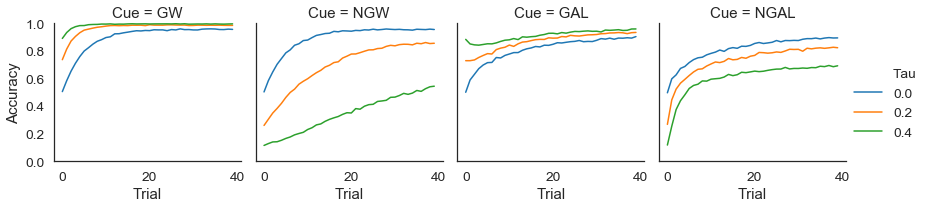

In [2]:
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
### Define parameters.
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

## Agent parameters.
n_agents = 5000
beta = 5.00            # Inverse temperature
eta  = 0.25            # Learning rate
tau  = 0.00            # Go bias 
nu   = 0.00            # Pavlovian bias
w    = 0.00            # Reframing ability

## Task parameters
n_trials = 40
params = dict(GW  = (0.2,0.8, 0), NGW  = (0.8,0.2, 0),
              GAL = (0.2,0.8,-1), NGAL = (0.8,0.2,-1))

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
### Simulate behavior.
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
np.random.seed(47404)

data = []
for tau in [0, 0.2, 0.4]:

    for label, (p1, p2, s) in params.items():

        ## Initialize agents.
        agents = AgentsPIT(beta, eta, tau, nu, w, n_agents=n_agents)

        ## Simulate outcomes.
        R = np.random.binomial(1, (p1,p2), (n_agents,n_trials,2)) + s
        
        ## Simulate behavior.
        Y = agents.train(R)
                
        ## Convert to DataFrame.
        Y = DataFrame(Y).reset_index().melt(id_vars='index', var_name='Trial', value_name='Choice')
        Y['Accuracy'] = (Y['Choice'] == 0) if p1==0.8 else (Y['Choice'] == 1)
        Y['Cue'] = label
        Y['Tau'] = tau
        data.append( Y )
        
## Concatenate DataFrames.
data = concat(data)

## Initialize canvas.
g = sns.FacetGrid(data, col='Cue', col_order=['GW','NGW','GAL','NGAL'])
palette = sns.color_palette(n_colors=3).as_hex()

## Plot actions.
g.map(sns.lineplot, 'Trial', 'Accuracy', 'Tau', hue_order=[0.0,0.2,0.4], palette=palette, ci=None)
g.set(ylim=(0,1), ylabel='Accuracy')
g.add_legend();

## Section 2: Varying Pavlovian Bias

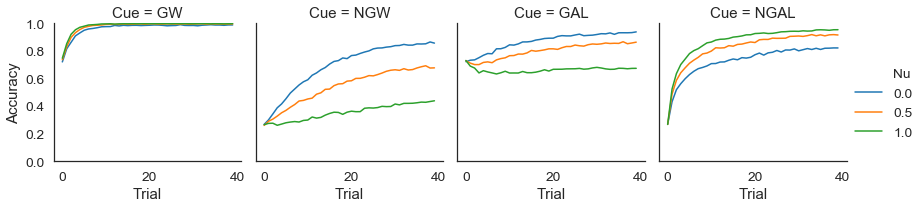

In [3]:
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
### Define parameters.
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

## Agent parameters.
n_agents = 5000
beta = 5.00            # Inverse temperature
eta  = 0.25            # Learning rate
tau  = 0.20            # Go bias 
nu   = 0.00            # Pavlovian bias
w    = 0.00            # Reframing ability

## Task parameters
n_trials = 40
params = dict(GW  = (0.2,0.8, 0), NGW  = (0.8,0.2, 0),
              GAL = (0.2,0.8,-1), NGAL = (0.8,0.2,-1))

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
### Simulate behavior.
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
np.random.seed(47404)

data = []
for nu in [0,0.5,1.0]:

    for label, (p1, p2, s) in params.items():

        ## Initialize agents.
        agents = AgentsPIT(beta, eta, tau, nu, w, n_agents=n_agents)

        ## Simulate outcomes.
        R = np.random.binomial(1, (p1,p2), (n_agents,n_trials,2)) + s
        
        ## Simulate behavior.
        Y = agents.train(R)
                
        ## Convert to DataFrame.
        Y = DataFrame(Y).reset_index().melt(id_vars='index', var_name='Trial', value_name='Choice')
        Y['Accuracy'] = (Y['Choice'] == 0) if p1==0.8 else (Y['Choice'] == 1)
        Y['Cue'] = label
        Y['Nu'] = nu
        data.append( Y )
        
## Concatenate DataFrames.
data = concat(data)

## Initialize canvas.
g = sns.FacetGrid(data, col='Cue', col_order=['GW','NGW','GAL','NGAL'])
palette = sns.color_palette(n_colors=3).as_hex()

## Plot actions.
g.map(sns.lineplot, 'Trial', 'Accuracy', 'Nu', hue_order=[0.0,0.5,1.0], palette=palette, ci=None)
g.set(ylim=(0,1), ylabel='Accuracy')
g.add_legend();

## Section 3: Varying Pavlovian Bias w/ Reframing

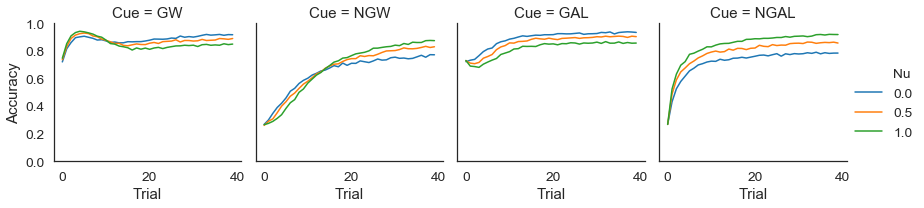

In [4]:
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
### Define parameters.
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

## Agent parameters.
n_agents = 5000
beta = 5.00            # Inverse temperature
eta  = 0.25            # Learning rate
tau  = 0.20            # Go bias 
nu   = 0.00            # Pavlovian bias
w    = 1.00            # Reframing ability

## Task parameters
n_trials = 40
params = dict(GW  = (0.2,0.8, 0), NGW  = (0.8,0.2, 0),
              GAL = (0.2,0.8,-1), NGAL = (0.8,0.2,-1))

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
### Simulate behavior.
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
np.random.seed(47404)

data = []
for nu in [0,0.5,1.0]:

    for label, (p1, p2, s) in params.items():

        ## Initialize agents.
        agents = AgentsPIT(beta, eta, tau, nu, w, n_agents=n_agents)

        ## Simulate outcomes.
        R = np.random.binomial(1, (p1,p2), (n_agents,n_trials,2)) + s
        
        ## Simulate behavior.
        Y = agents.train(R)
                
        ## Convert to DataFrame.
        Y = DataFrame(Y).reset_index().melt(id_vars='index', var_name='Trial', value_name='Choice')
        Y['Accuracy'] = (Y['Choice'] == 0) if p1==0.8 else (Y['Choice'] == 1)
        Y['Cue'] = label
        Y['Nu'] = nu
        data.append( Y )
        
## Concatenate DataFrames.
data = concat(data)

## Initialize canvas.
g = sns.FacetGrid(data, col='Cue', col_order=['GW','NGW','GAL','NGAL'])
palette = sns.color_palette(n_colors=3).as_hex()

## Plot actions.
g.map(sns.lineplot, 'Trial', 'Accuracy', 'Nu', hue_order=[0.0,0.5,1.0], palette=palette, ci=None)
g.set(ylim=(0,1), ylabel='Accuracy')
g.add_legend();

## Section 4: Varying Pavlovian State Value w/ Reframing

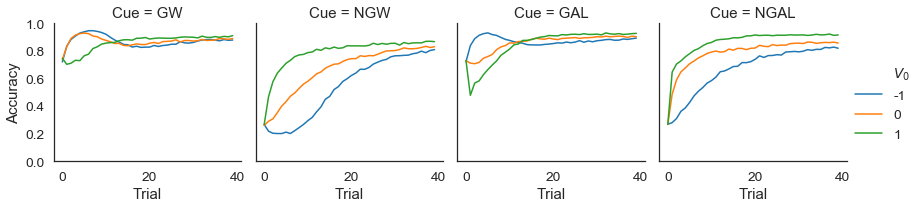

In [5]:
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
### Define parameters.
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

## Agent parameters.
n_agents = 5000
beta = 5.00            # Inverse temperature
eta  = 0.25            # Learning rate
tau  = 0.20            # Go bias 
nu   = 0.50            # Pavlovian bias
w    = 1.00            # Reframing ability

## Task parameters
n_trials = 40
params = dict(GW  = (0.2,0.8, 0), NGW  = (0.8,0.2, 0),
              GAL = (0.2,0.8,-1), NGAL = (0.8,0.2,-1))

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
### Simulate behavior.
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
np.random.seed(47404)

data = []
for v0 in [-1,0,1]:

    for label, (p1, p2, s) in params.items():

        ## Initialize agents.
        agents = AgentsPIT(beta, eta, tau, nu, w, v0=v0, n_agents=n_agents)

        ## Simulate outcomes.
        R = np.random.binomial(1, (p1,p2), (n_agents,n_trials,2)) + s
        
        ## Simulate behavior.
        Y = agents.train(R)
                
        ## Convert to DataFrame.
        Y = DataFrame(Y).reset_index().melt(id_vars='index', var_name='Trial', value_name='Choice')
        Y['Accuracy'] = (Y['Choice'] == 0) if p1==0.8 else (Y['Choice'] == 1)
        Y['Cue'] = label
        Y[r'$V_0$'] = v0
        data.append( Y )
        
## Concatenate DataFrames.
data = concat(data)

## Initialize canvas.
g = sns.FacetGrid(data, col='Cue', col_order=['GW','NGW','GAL','NGAL'])
palette = sns.color_palette(n_colors=3).as_hex()

## Plot actions.
g.map(sns.lineplot, 'Trial', 'Accuracy', r'$V_0$', hue_order=[-1,0,1], palette=palette, ci=None)
g.set(ylim=(0,1), ylabel='Accuracy')
g.add_legend();